In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
with open('data/dynamic_log_icra2024_3trees_deletion_smalltrees.json') as f:
    data = json.load(f)
    
df = pd.json_normalize(data)
df.columns = df.columns.str.replace('.*(?=\.).','',regex=True)
df['planner'] = df['planner'].replace({
    'dynamic_planner_fre': 'Full reorder',
    'dynamic_planner_lci': 'Our method',
    'dynamic_planner_initial_orbit': 'Initial orbit'
})
df['Length/Visited'] = df['total_path_length'] / df['n_visited']
df['p_given'] = df['n_given'] / df['n_total']
df['p_given'] = 100.0 * (df['p_given']*4.0).round() / 4.0
df['p_discoverable'] = df['n_discoverable'] / df['n_total']
df['p_discoverable'] = 100.0 * (df['p_discoverable']*4.0).round() / 4.0
df['p_false'] = df['n_false'] / df['n_total']
df['p_false'] = 100.0 * (df['p_false'] * 4.0).round() / 4.0
df['% visited'] = 100.0 * df['n_visited'] / df['n_total']

norm_value = df[(df['planner'] == 'Our method') & (df['p_given'] == 100)][['tree_model','Length/Visited', 'time']].groupby('tree_model').mean()
df = df.merge(norm_value, left_on='tree_model', right_index=True, how='left', suffixes=('', ' (normalized)'))
df['Length/Visited (Normalized)'] = df['Length/Visited'] / df['Length/Visited (normalized)']
df['Runtime (Normalized)'] = df['time'] / df['time (normalized)']

In [3]:
df

,planner,n_discoverable,n_false,n_given,n_total,tree_model,visibility_model,discoverable,false_positives,known_unvisited,...,total_path_length,Length/Visited,p_given,p_discoverable,p_false,% visited,Length/Visited (normalized),time (normalized),Length/Visited (Normalized),Runtime (Normalized)
0,Full reorder,40,60,0,100,orangetree3,mesh_occlusion_end_effector,28,60,12,...,91.077203,7.005939,0.0,50.0,50.0,13.0,4.707593,33551.0,1.488221,3.896039
1,Full reorder,0,100,0,100,orangetree3,mesh_occlusion_end_effector,0,100,0,...,88.409613,inf,0.0,0.0,100.0,0.0,4.707593,33551.0,inf,6.543352
2,Our method,20,30,0,50,peartree1,mesh_occlusion_end_effector,19,30,1,...,126.691948,7.038442,0.0,50.0,50.0,36.0,4.152560,11765.2,1.694964,1.091184
3,Our method,40,10,50,100,peartree2,mesh_occlusion_end_effector,35,10,55,...,279.681652,3.252112,50.0,50.0,0.0,86.0,3.095920,33198.2,1.050451,1.164762
4,Our method,0,50,50,100,orangetree3,mesh_occlusion_end_effector,0,50,50,...,195.659503,5.016910,50.0,0.0,50.0,39.0,4.707593,33551.0,1.065706,1.116509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,Full reorder,40,10,50,100,orangetree3,mesh_occlusion_end_effector,23,10,67,...,355.371579,4.615215,50.0,50.0,0.0,77.0,4.707593,33551.0,0.980377,2.587345
671,Our method,50,0,0,50,peartree1,mesh_occlusion_end_effector,48,0,2,...,222.874024,4.643209,0.0,100.0,0.0,96.0,4.152560,11765.2,1.118156,1.398616
672,Full reorder,50,0,0,50,peartree1,mesh_occlusion_end_effector,48,0,2,...,189.447775,3.946829,0.0,100.0,0.0,96.0,4.152560,11765.2,0.950457,3.285792
673,Our method,60,40,0,100,orangetree3,mesh_occlusion_end_effector,49,40,11,...,235.592805,4.908183,0.0,50.0,50.0,48.0,4.707593,33551.0,1.042610,1.544783


In [4]:
df['Runtime (Normalized)']

0      3.896039
1      6.543352
2      1.091184
3      1.164762
4      1.116509
         ...   
670    2.587345
671    1.398616
672    3.285792
673    1.544783
674    3.001997
Name: Runtime (Normalized), Length: 675, dtype: float64

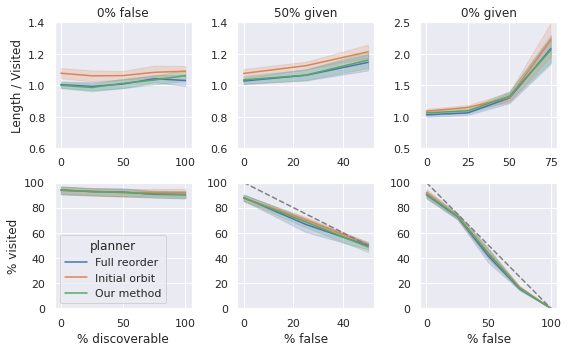

In [5]:
fig, axes = plt.subplots(2,3, figsize=(8,5))

sns.lineplot(data=df[df['n_false'] == 0].sort_values('planner'), x='p_discoverable', y='Length/Visited (Normalized)', hue='planner', ax=axes[0][0], legend=False)
sns.lineplot(data=df[df['p_given'] == 50].sort_values('planner'), x='p_false', y='Length/Visited (Normalized)', hue='planner', ax=axes[0][1], legend=False)
sns.lineplot(data=df[df['p_given'] == 0.0].sort_values('planner'), x='p_false', y='Length/Visited (Normalized)', hue='planner', ax=axes[0][2], legend=False)

sns.lineplot(data=df[df['n_false'] == 0].sort_values('planner'), x='p_discoverable', y='% visited', hue='planner', ax=axes[1][0], legend=True)
sns.lineplot(data=df[df['p_given'] == 50].sort_values('planner'), x='p_false', y='% visited', hue='planner', ax=axes[1][1], legend=False)
sns.lineplot(data=df[df['p_given'] == 0.0].sort_values('planner'), x='p_false', y='% visited', hue='planner', ax=axes[1][2], legend=False)

axes[0][0].set_ylim(0.6,1.4)
axes[0][1].set_ylim(0.6,1.4)
axes[0][2].set_ylim(0.5,2.5)

axes[1][0].plot([0,100],[100,100], color='grey', linestyle='--')
axes[1][1].plot([0,50],[100,50], color='grey', linestyle='--')
axes[1][2].plot([0,100],[100,0.0], color='grey', linestyle='--')

axes[1][0].set_ylim(0.0,100.0)
axes[1][1].set_ylim(0.0,100.0)
axes[1][2].set_ylim(0.0,100.0)
    
for ax_row in axes:
    for ax in ax_row:
        ax.set_xlabel('')
        ax.set_ylabel('')
        
axes[0,0].set_ylabel('Length / Visited')
axes[1,0].set_ylabel('% visited')

axes[1,0].set_xlabel('% discoverable')
axes[1,1].set_xlabel('% false')
axes[1,2].set_xlabel('% false')

axes[0,0].set_title('0% false')
axes[0,1].set_title('50% given')
axes[0,2].set_title('0% given')

plt.tight_layout()
# plt.savefig('plots_combined.pdf')

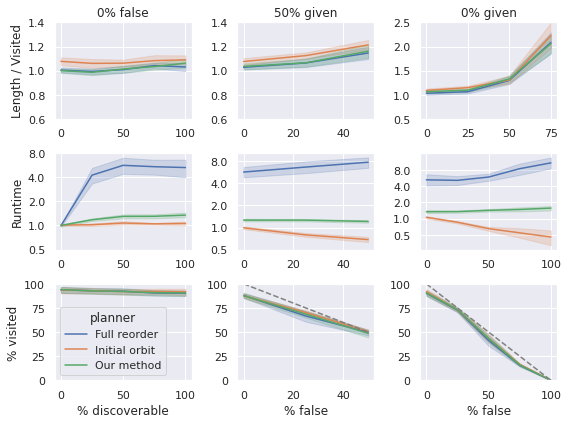

In [6]:
fig, axes = plt.subplots(3,3, figsize=(8,6))

sns.lineplot(data=df[df['n_false'] == 0].sort_values('planner'), x='p_discoverable', y='Length/Visited (Normalized)', hue='planner', ax=axes[0][0], legend=False)
sns.lineplot(data=df[df['p_given'] == 50].sort_values('planner'), x='p_false', y='Length/Visited (Normalized)', hue='planner', ax=axes[0][1], legend=False)
sns.lineplot(data=df[df['p_given'] == 0.0].sort_values('planner'), x='p_false', y='Length/Visited (Normalized)', hue='planner', ax=axes[0][2], legend=False)

sns.lineplot(data=df[df['n_false'] == 0].sort_values('planner'), x='p_discoverable', y='Runtime (Normalized)', hue='planner', ax=axes[1][0], legend=False)
sns.lineplot(data=df[df['p_given'] == 50].sort_values('planner'), x='p_false', y='Runtime (Normalized)', hue='planner', ax=axes[1][1], legend=False)
sns.lineplot(data=df[df['p_given'] == 0.0].sort_values('planner'), x='p_false', y='Runtime (Normalized)', hue='planner', ax=axes[1][2], legend=False)

sns.lineplot(data=df[df['n_false'] == 0].sort_values('planner'), x='p_discoverable', y='% visited', hue='planner', ax=axes[2][0], legend=True)
sns.lineplot(data=df[df['p_given'] == 50].sort_values('planner'), x='p_false', y='% visited', hue='planner', ax=axes[2][1], legend=False)
sns.lineplot(data=df[df['p_given'] == 0.0].sort_values('planner'), x='p_false', y='% visited', hue='planner', ax=axes[2][2], legend=False)

axes[0][0].set_ylim(0.6,1.4)
axes[0][1].set_ylim(0.6,1.4)
axes[0][2].set_ylim(0.5,2.5)

axes[1][0].set_yscale('log')
axes[1][0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axes[1][0].set_yticks([0.5,1.0,2.0,4.0,8.0])

axes[1][1].set_yscale('log')
axes[1][1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axes[1][1].set_yticks([0.5,1.0,2.0,4.0,8.0])

axes[1][2].set_yscale('log')
axes[1][2].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axes[1][2].set_yticks([0.5,1.0,2.0,4.0,8.0])

axes[2][0].plot([0,100],[100,100], color='grey', linestyle='--')
axes[2][1].plot([0,50],[100,50], color='grey', linestyle='--')
axes[2][2].plot([0,100],[100,0.0], color='grey', linestyle='--')
axes[2][0].set_ylim(0.0,100.0)
axes[2][1].set_ylim(0.0,100.0)
axes[2][2].set_ylim(0.0,100.0)

# axes[2][0].set_ylim(0.0,50000.0)
# axes[2][1].set_ylim(0.0,50000.0)
# axes[2][2].set_ylim(0.0,50000.0)
    
for ax_row in axes:
    for ax in ax_row:
        ax.set_xlabel('')
        ax.set_ylabel('')
        
axes[0,0].set_ylabel('Length / Visited')
axes[1,0].set_ylabel('Runtime')
axes[2,0].set_ylabel('% visited')

axes[-1,0].set_xlabel('% discoverable')
axes[-1,1].set_xlabel('% false')
axes[-1,2].set_xlabel('% false')

axes[0,0].set_title('0% false')
axes[0,1].set_title('50% given')
axes[0,2].set_title('0% given')

plt.tight_layout()
plt.savefig('plots_combined.pdf')

In [7]:
df[df['p_discoverable'] == 100.0].groupby('planner')['Runtime (Normalized)'].mean()

planner
Full reorder     5.287172
Initial orbit    1.060575
Our method       1.346268
Name: Runtime (Normalized), dtype: float64

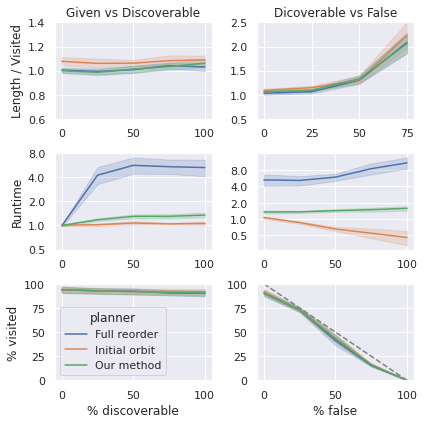

In [8]:
fig, axes = plt.subplots(3,2, figsize=(6,6))

sns.lineplot(data=df[df['n_false'] == 0].sort_values('planner'), x='p_discoverable', y='Length/Visited (Normalized)', hue='planner', ax=axes[0][0], legend=False)
sns.lineplot(data=df[df['p_given'] == 0.0].sort_values('planner'), x='p_false', y='Length/Visited (Normalized)', hue='planner', ax=axes[0][1], legend=False)

sns.lineplot(data=df[df['n_false'] == 0].sort_values('planner'), x='p_discoverable', y='Runtime (Normalized)', hue='planner', ax=axes[1][0], legend=False)
sns.lineplot(data=df[df['p_given'] == 0.0].sort_values('planner'), x='p_false', y='Runtime (Normalized)', hue='planner', ax=axes[1][1], legend=False)

sns.lineplot(data=df[df['n_false'] == 0].sort_values('planner'), x='p_discoverable', y='% visited', hue='planner', ax=axes[2][0], legend=True)
sns.lineplot(data=df[df['p_given'] == 0.0].sort_values('planner'), x='p_false', y='% visited', hue='planner', ax=axes[2][1], legend=False)

axes[0][0].set_ylim(0.6,1.4)
axes[0][1].set_ylim(0.5,2.5)

axes[1][0].set_yscale('log')
axes[1][0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axes[1][0].set_yticks([0.5,1.0,2.0,4.0,8.0])

axes[1][1].set_yscale('log')
axes[1][1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axes[1][1].set_yticks([0.5,1.0,2.0,4.0,8.0])

axes[2][0].plot([0,100],[100,100], color='grey', linestyle='--')
axes[2][1].plot([0,100],[100,0.0], color='grey', linestyle='--')
axes[2][0].set_ylim(0.0,100.0)
axes[2][1].set_ylim(0.0,100.0)
    
for ax_row in axes:
    for ax in ax_row:
        ax.set_xlabel('')
        ax.set_ylabel('')
        
axes[0,0].set_ylabel('Length / Visited')
axes[1,0].set_ylabel('Runtime')
axes[2,0].set_ylabel('% visited')

axes[-1,0].set_xlabel('% discoverable')
axes[-1,1].set_xlabel('% false')

axes[0,0].set_title('Given vs Discoverable')
# axes[0,1].set_title('50% given')
axes[0,1].set_title('Dicoverable vs False')

plt.tight_layout()
plt.savefig('plots_combined_twocols.pdf')

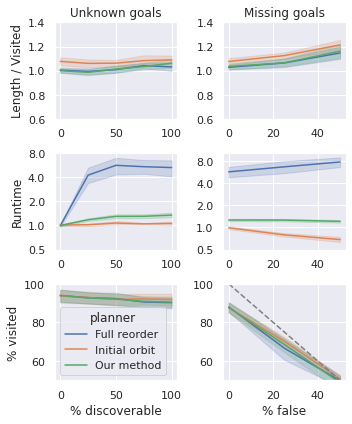

In [10]:
fig, axes = plt.subplots(3,2, figsize=(5,6))

sns.lineplot(data=df[df['n_false'] == 0].sort_values('planner'), x='p_discoverable', y='Length/Visited (Normalized)', hue='planner', ax=axes[0][0], legend=False)
sns.lineplot(data=df[df['p_given'] == 50].sort_values('planner'), x='p_false', y='Length/Visited (Normalized)', hue='planner', ax=axes[0][1], legend=False)

sns.lineplot(data=df[df['n_false'] == 0].sort_values('planner'), x='p_discoverable', y='Runtime (Normalized)', hue='planner', ax=axes[1][0], legend=False)
sns.lineplot(data=df[df['p_given'] == 50].sort_values('planner'), x='p_false', y='Runtime (Normalized)', hue='planner', ax=axes[1][1], legend=False)

sns.lineplot(data=df[df['n_false'] == 0].sort_values('planner'), x='p_discoverable', y='% visited', hue='planner', ax=axes[2][0], legend=True)
sns.lineplot(data=df[df['p_given'] == 50].sort_values('planner'), x='p_false', y='% visited', hue='planner', ax=axes[2][1], legend=False)

axes[0][0].set_ylim(0.6,1.4)
axes[0][1].set_ylim(0.6,1.4)

axes[1][0].set_yscale('log')
axes[1][0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axes[1][0].set_yticks([0.5,1.0,2.0,4.0,8.0])

axes[1][1].set_yscale('log')
axes[1][1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axes[1][1].set_yticks([0.5,1.0,2.0,4.0,8.0])

axes[2][0].plot([0,100],[100,100], color='grey', linestyle='--')
axes[2][1].plot([0,50],[100,50], color='grey', linestyle='--')
axes[2][0].set_ylim(50.0,100.0)
axes[2][1].set_ylim(50.0,100.0)
    
for ax_row in axes:
    for ax in ax_row:
        ax.set_xlabel('')
        ax.set_ylabel('')
        
axes[0,0].set_ylabel('Length / Visited')
axes[1,0].set_ylabel('Runtime')
axes[2,0].set_ylabel('% visited')

axes[-1,0].set_xlabel('% discoverable')
axes[-1,1].set_xlabel('% false')

axes[0,0].set_title('Unknown goals')
axes[0,1].set_title('Missing goals')

plt.tight_layout()
plt.savefig('plots_combined.pdf')